In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize=(10, 3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

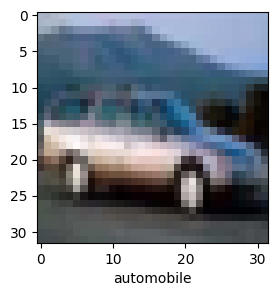

In [9]:
plot_sample(X_train, y_train, 4)

In [10]:
X_train = X_train/255
X_test = X_test/255

### ANN

In [11]:
# Artifical Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3002 - loss: 1.9362
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4223 - loss: 1.6424
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4548 - loss: 1.5478
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4789 - loss: 1.4761
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4931 - loss: 1.4363


In [12]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4765 - loss: 1.4642


[1.4712923765182495, 0.46959999203681946]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.58      0.53      1000
           1       0.45      0.77      0.57      1000
           2       0.35      0.40      0.37      1000
           3       0.33      0.44      0.37      1000
           4       0.45      0.37      0.40      1000
           5       0.54      0.17      0.25      1000
           6       0.54      0.52      0.53      1000
           7       0.69      0.40      0.50      1000
           8       0.53      0.69      0.60      1000
           9       0.58      0.37      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



### CNN

In [16]:
cnn = models.Sequential([

    # cnn layers
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense newtwork
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3370 - loss: 1.7981
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5576 - loss: 1.2331
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6142 - loss: 1.1015
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6506 - loss: 0.9953
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6715 - loss: 0.9378
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6862 - loss: 0.8936
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7051 - loss: 0.8445
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7163 - loss: 0.8031
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7307 - loss: 0.7756
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7432 - loss: 0.7286
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7509 - loss: 0.7066
Epoch 12/15
1563/1563 ━━━━━━

In [19]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6745 - loss: 0.9951


[0.9929655194282532, 0.6736000180244446]

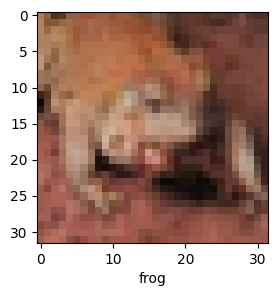

In [20]:
# convert 2d y_test to 1d
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 5)

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0868441e-02, 4.2636663e-04, 1.5193428e-01, 6.3642001e-01,
        9.8540995e-04, 1.8213631e-01, 1.3595478e-02, 4.4874757e-04,
        3.0650510e-03, 1.1997482e-04],
       [1.2921250e-02, 4.3719992e-01, 9.0722360e-06, 6.5263903e-06,
        5.2725554e-06, 5.4550782e-08, 8.2142799e-07, 6.2040035e-06,
        5.3057492e-01, 1.9275827e-02],
       [1.1409983e-01, 3.4106222e-01, 5.9271483e-03, 7.6509621e-03,
        1.7838149e-03, 7.7528035e-04, 1.1328727e-03, 1.6215613e-02,
        2.3560910e-01, 2.7574319e-01],
       [7.9146075e-01, 2.7394961e-04, 9.8611072e-02, 4.9053947e-03,
        7.5902537e-02, 7.7912773e-05, 3.2152238e-03, 6.2298635e-04,
        2.4696143e-02, 2.3392240e-04],
       [1.6462707e-05, 1.0219543e-06, 5.4995432e-02, 6.9806944e-03,
        5.7176358e-01, 1.1768261e-03, 3.6493963e-01, 1.2568981e-04,
        5.3016169e-07, 1.0488940e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

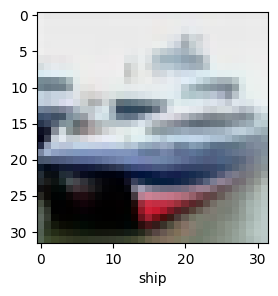

In [26]:
plot_sample(X_test, y_test, 1)

In [27]:
classes[y_classes[1]]

'ship'

In [30]:
print('Classification report: \n', classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.86      0.77      0.81      1000
           2       0.53      0.59      0.56      1000
           3       0.48      0.52      0.50      1000
           4       0.63      0.60      0.62      1000
           5       0.60      0.61      0.61      1000
           6       0.73      0.76      0.75      1000
           7       0.61      0.79      0.69      1000
           8       0.82      0.74      0.78      1000
           9       0.86      0.67      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000

